# Question 1 

Let $S$ be a finite set and a discrete random variable with possible values $\{x_1,...,x_n\}$ of probabilities $\{p(x_1),...,p(x_n)\}$. The entropy (in bit/symbol) of the source $S$ is defined as:

$H(S) = -\sum_{i=1}^{n} p(x_i)\log_2(p(x_i))$.

For any given random data vector $X$ of arbitrary length taking values into $S$, we compute the  probabilities $\{p(x_1),...,p(x_n)\}$ by using the following formula: 

$\forall i \in{S}, p(x_i) = \frac{\text{number of occurences of i in X}}{\text{size of X}}.$

To count the number of occurences of each symbol of $S$ in $X$, we use the Python function collections.Counter. 

The following code snippet returns the entropy of a random data vector $X$ of arbitrary length taking values into a set $S$.

In [1]:
import collections
import math

def entropy(l):
    c = collections.Counter(l)
    p = [v/len(l) for v in c.values()]
    return -sum([p[i]*math.log2(p[i]) for i in range(len(p))])


# Question 2

The following code snippet checks that a sufficiently long vector of random independent, equiprobable bits, has entropy $H = 1$ 
bit/symbol. 

We generate a random vector $d$ of size $100$ and taking values into $S = \{0,1\}$. As we use the Python function randint, each bit is independant from the others and equiprobable.

In [2]:
from random import randint
d=[randint(0,1) for _ in range(100)]
print(d)
entropy(d)

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0]


0.9709505944546686

# Question 3

The following code snippet draws the variations of the entropy as a function of $\alpha = p(X=0)$ for a binomial law (blue curve) and for an uniform law (orange curve).

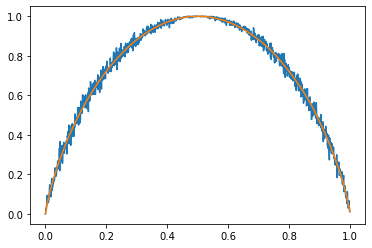

In [3]:
import matplotlib.pyplot as plt
import numpy as np

sample = 1000
x = np.arange(0,1,1/sample) #generating an array of 𝛼 with a 0.001 step

plt.plot(x, [entropy(np.random.binomial(1, 1-i, size=1000)) for i in x]) #drawing entropy for each 𝛼 (binomial law)
plt.plot(x, [entropy([1]*int((1-i)*sample)+[0]*int(i*sample)) for i in x]) #drawing entropy for each 𝛼 (exact proportion)
pass


# Question 4

Let $S$ be a discrete source with memory using the binary alphabet $𝒜 = \{0,1\}$.

To compute the entropy of such a source, accounting for the memory effect would require conditioning the entropy of the current
symbol with respect to its past up to some order $q$ :

   \begin{equation*}
   H(x_k) = \sum_{𝒜} H(x_k | x_{k-1},x_{k-2},...,x_{k-q})p(x_k | x_{k-1},x_{k-2},...,x_{k-q})
   \end{equation*}
where 𝒜 is the set of all possible outputs of the random variables $\{x_{k-1}, x_{k-2},..., x_{k-q}\}$.

We consider here the case of a first order memory effect $q = 1$ (Markov chain). Thus, we have :

$\begin{equation*}H(x_k) = \sum_{𝒜} H(x_k | x_{k-1})p(x_{k-1})\end{equation*}$

A first order Markov chain is completely defined by its transition matrix $\Pi$: 

$$\Pi = \begin{pmatrix} p(x_k = 0 | x_{k-1} = 0) & p(x_k = 1 | x_{k-1} = 0) \\ p(x_k = 0 | x_{k-1} = 1) & p(x_k = 1 | x_{k-1} = 1) \end{pmatrix} = \begin{pmatrix} p_{00} & p_{10} \\ p_{01} & p_{11}\end{pmatrix}$$

We define $p_0$ and $p_1$ as follows: $p_0 = p(x_k = 0)$ and $p_1 = p(x_k = 1) = 1 - p_0$.

Moreover, the Markov chain is stationnary, so $P = P\Pi$ where $P = \begin{pmatrix} p_0 & p_1 \end{pmatrix}$.

Thus $P = \begin{pmatrix} p_0 & p_1 \end{pmatrix}\begin{pmatrix} p_{00} & p_{10} \\ p_{01} & p_{11}\end{pmatrix}
\Leftrightarrow \bigg\{ \begin{array}{11}p_0 = p_0 p_{00} + p_1 p_{01} \\ p_1 = p_0 p_{10} + p_1 p_{11}\end{array}$
$\Leftrightarrow \bigg\{ \begin{array}{11}p_0 = p_0 p_{00} + (1-p_0)p_{01} \\ p_1 = p_0 p_{10} + p_1 p_{11}\end{array}$
$\Leftrightarrow \bigg\{ \begin{array}{11}p_0(1-p_{00}+ p_{01}) = p_{01} \\ p_1 = p_0 p_{10} + p_1 p_{11}\end{array}$

Finally: $\boxed{ \begin{array}{11} p_0 = \frac{p_{01}}{1-p_{00}+p_{01}} \\ p_1 = 1-p_0 = 1-\frac{p_{01}}{1-p_{00}+p_{01}}= \frac{1 - p_{00}}{1-p_{00}+p_{01}} \end{array}}$

Moreover: $\begin{equation*}H(x_k) = \sum_{𝒜} H(x_k | x_{k-1})p(x_{k-1})\end{equation*}$

$=H(x_k|x_{k-1}=0)p_0 + H(x_k|x_{k-1}=1)p_1$

$= -\left[p(x_k=0|x_{k-1}=0)\log_2(x_k=0|x_{k-1}=0) + p(x_k=1|x_{k-1}=0)\log_2(x_k=1|x_{k-1}=0)\right]p_0 
-\left[p(x_k=0|x_{k-1}=1)\log_2(x_k=0|x_{k-1}=1) + p(x_k=1|x_{k-1}=1)\log_2(x_k=1|x_{k-1}=1)\right]p_1$

$=\boxed{\begin{array}{rcl}-(p_{00}\log_2(p_{00})+p_{10}\log_2(p_{10}))p_0 - (p_{01}\log_2(p_{01}) + p_{11}\log_2(p_{11}))p_1\end{array}}$


# Question 5

First, we open the image by using the IPython library.

In [4]:
from PIL import Image

img = Image.open("scan.png", mode="r")
print(img.format, img.size, img.mode)
im = np.array(img.getdata()) #getting pixel values of the image(0 (resp.) 1 if black (resp. white))

PNG (2550, 3300) P


Then, we run the following function that computes the transmission matrix defined at the previous question and returns the entropy of the pixel values of the image, using Pillow library.

In [5]:
import collections
from math import log2
import numpy as np

def entropy_markov_chain(l):
    pi = collections.Counter([ (l[i], l[i+1]) for i in range(len(l)-1)])#counts occurences of each pair (0,0),(0,1),(1,0) and (1,1)
    pi = dict([(k, v/len(im)) for k,v in pi.items()]) #computes probabilities for each pair
    p0 = pi[(0,1)]/(1-pi[(0,0)]+pi[(0,1)]) #computes p0 and p1 using formulae above
    p1 = 1-p0
    #returns entropy of the source with memory
    return -(pi[(0,0)]*log2(pi[(0,0)])+pi[(1,0)]*log2(pi[(1,0)]))*p0\
           -(pi[(0,1)]*log2(pi[(0,1)])+pi[(1,1)]*log2(pi[(1,1)]))*p1

In [6]:
entropy_markov_chain(im)

0.16776467500144174

In [7]:
entropy(im)

0.2833745831777161

We can see that when we take into consideration the spacial dependancy between pixels, the entropy is lower than when the source is memoryless.

Indeed, in the first case, a pixel contains less information because it is possible to infer its value from its adjacent pixels.

In [8]:
print(len(im))
print(len(im)*0.17)

8415000
1430550.0


# Question 6 - Run Length Encoding

The first bits says if the sequence starts with $0$ or $1$.

Then we build an array of n-bits long counters that count the length of sub-sequences containing the same digit. If the counter reaches $2^n$ we don't change digit, the next n-bits will still be representing the same digit. If not, the next n-bits will be representing the other digit and so on...

Example: 

Let's consider a sequence containing $256$ zeros and $2$ ones and $n=8$ bits.

As $256 > 2^8 -1 = 255$, we will encode the zeros with two arrays: $[1,1,1,1,1,1,1,1]$ and $[0,0,0,0,0,0,0,1]$. The first array represents the first 255 zeros and the second array the last remaining zero.

As $2 < 255$, the ones will be encoded with one single array: $[0,0,0,0,0,0,1,0]$.

Finally, our encoded sequence will be (the first item of the array is $0$ because the sequence is beginning with a zero): 

$[0,[1,1,1,1,1,1,1,1],[0,0,0,0,0,0,0,1],[0,0,0,0,0,0,1,0]]$

In [9]:
def to_dec(l): #transforms an array of digits (0 and 1) into an integer
    l.reverse()
    return sum([2**i for i,x in enumerate(l) if x==1])

def to_bin(a, n): #transforms an integer into an array of digits (0 and 1) of size n 
    return [int(x) for x in list(('{0:0'+str(n)+'b}').format(a))]

def count(data, i): #returns the length of sub-sequences containing the same digit 
    cnt = 0
    while i+cnt+1<len(data) and data[i+cnt]==data[i+cnt+1]:
        cnt+=1
    return cnt

def rle_encode(data, n=8): #encodes a given sequence with 8-bit long counters
    i = 0
    out = [data[0]]
    while i<len(data):
        cnt = count(data, i)
        while cnt > (2**n)-1-1: 
            out.extend([1]*n) #if the counter is > 2^n we add to the result an array of n 1 
            cnt-=(2**n)-1 #update of counter (counter = counter - 2^n)
            i+=(2**n)-1
        out.extend(to_bin(cnt, n))#adding to result an array containing the counter (in binary)
        i+=cnt+1
    return out
    
def rle_decode(data, n=8): #decodes an array with 8-bit long counters into a sequence of digits
    i = 1
    out = []
    cur = data[0] #current digit
    while i < len(data):
        l_total = l = to_dec(data[i:i+n])#get the n first digits of encoded array i.e. counter value
        while l==(2**n)-1: #iterating through subarrays while the counter value contained in subarray is equal to 2^n
            i+=n
            l = to_dec(data[i:i+n])
            l_total += l #update total length of current subsequence
        out.extend([cur]*(l_total+1))#adding subsequence to result
        cur = 1 if cur==0 else 0 #update current digit
        i+=n
    return out
    

In [10]:
rle = rle_encode(im) #encodes image

In [11]:
im2 = rle_decode(rle) #decodes image

Finally, we display the image that has been encoded and decoded with RLE to check wether the encoding works. We generate the image from an array containing pixel values with matplotlib library. The generated 

In [12]:
from PIL import Image
import numpy as np

w, h = img.size
data = np.array(im2, dtype=np.uint8)
data = np.reshape(data, (h, w))

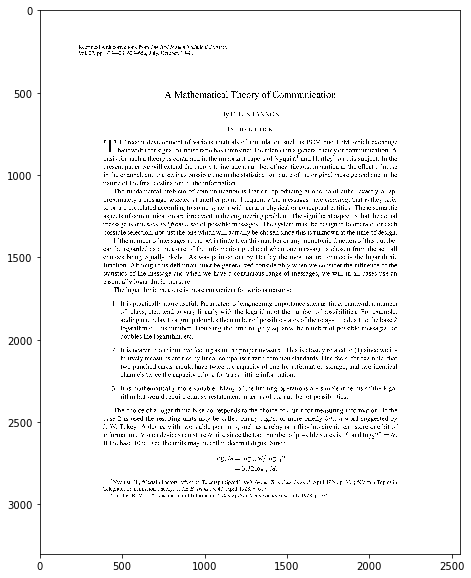

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize = (20,10))
plt.imshow(data, cmap='Greys_r')
mpimg.imsave("scan2.png", data, cmap='Greys_r')